# Naive Bayes

## Análise de Sentimentos

In [2]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [3]:
dataset = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\NaiveBayes-Materiais-de-Apoio\Tweets_Mg.csv",encoding='utf-8')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

In [5]:
# Expante o tamanho de exibição de coluna de texto
pd.set_option('display.max_colwidth', -1)
dataset.Text.head(100)

<ipython-input-5-e0a31e9b9484>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


0     ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ                                                         
1     � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf                                                                             
2     �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw                                                                            
3     ��� https://t.co/BnDsO34qK0                                                                                                                
4     ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5             
                                                                   ...                                                                           
95    #noticiasdorenan Uso de depósitos judiciais pelo governo tem nova polêmica em MG: O Banco… https://t.co/kHuZpKQaj5    

**Excluir Linhas duplicadas**

In [7]:
dataset.drop_duplicates(['Text'],inplace=True)

In [8]:
dataset.count()

Unnamed: 0                   5765
Created At                   5765
Text                         5765
Geo Coordinates.latitude     104 
Geo Coordinates.longitude    104 
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                   1   
Unnamed: 10                  0   
Unnamed: 11                  0   
Unnamed: 12                  0   
Unnamed: 13                  0   
Unnamed: 14                  0   
Unnamed: 15                  0   
Unnamed: 16                  0   
Unnamed: 17                  0   
Unnamed: 18                  0   
Unnamed: 19                  0   
Unnamed: 20                  0   
Unnamed: 21                  0   
Unnamed: 22                  0   
Unnamed: 23                  0   
Unnamed: 24                  0   
dtype: int64

**Removendo colunas desnecessárias**

In [12]:
for i in dataset.columns.values:
    if i.startswith('Unnamed'):
        dataset.drop(i, axis=1, inplace=True)
        print('Colunas Deletadas:',i)

Colunas Deletadas: Unnamed: 0
Colunas Deletadas: Unnamed: 10
Colunas Deletadas: Unnamed: 11
Colunas Deletadas: Unnamed: 12
Colunas Deletadas: Unnamed: 13
Colunas Deletadas: Unnamed: 14
Colunas Deletadas: Unnamed: 15
Colunas Deletadas: Unnamed: 16
Colunas Deletadas: Unnamed: 17
Colunas Deletadas: Unnamed: 18
Colunas Deletadas: Unnamed: 19
Colunas Deletadas: Unnamed: 20
Colunas Deletadas: Unnamed: 21
Colunas Deletadas: Unnamed: 22
Colunas Deletadas: Unnamed: 23
Colunas Deletadas: Unnamed: 24


In [13]:
# Visualizando o dataset depois das alterações

dataset.columns

Index(['Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação'],
      dtype='object')

Distribuição das classes neutros, positivos e negativos

In [16]:
dataset.Classificacao

0       Neutro  
1       Neutro  
2       Neutro  
3       Neutro  
4       Negativo
          ...   
8194    Positivo
8195    Positivo
8196    Positivo
8197    Positivo
8198    Positivo
Name: Classificacao, Length: 5765, dtype: object

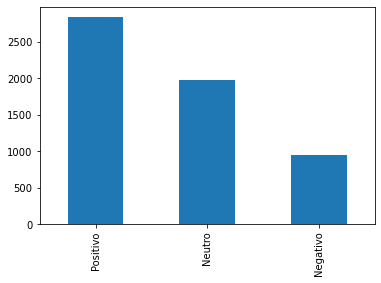

In [15]:
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar');

Separando tweets e suas classes

In [17]:
tweets = dataset['Text']
classes = dataset['Classificacao']

In [18]:
tweets.head()

0    ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ                                            
1    � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf                                                                
2    �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw                                                               
3    ��� https://t.co/BnDsO34qK0                                                                                                   
4    ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5
Name: Text, dtype: object

In [19]:
classes.head()

0    Neutro  
1    Neutro  
2    Neutro  
3    Neutro  
4    Negativo
Name: Classificacao, dtype: object

Gerando o modelo

In [21]:
vectorizer = CountVectorizer(analyzer='word')
freq_tweets = vectorizer.fit_transform(tweets)

In [22]:
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [23]:
freq_tweets.shape

(5765, 13029)

In [24]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Cria um modelo usando Naive Bayes Multinomial

In [25]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

Testando o modelo com algumas instâncias simples

In [26]:
# defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [31]:
# Transforma os dados de teste em vetores de palavras.
freq_testes = vectorizer.transform(testes)

In [35]:
modelo.predict(freq_testes)

array(['Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro'], dtype='<U8')

In [32]:
# Fazendo a classificação com o modelo treinado.
for t,c in zip (testes, modelo.predict(freq_testes)):
    print(t +", "+ c)

Esse governo está no início, vamos ver o que vai dar, Neutro
Estou muito feliz com o governo de Minas esse ano, Neutro
O estado de Minas Gerais decretou calamidade financeira!!!, Negativo
A segurança desse país está deixando a desejar, Neutro
O governador de Minas é mais uma vez do PT, Neutro


In [34]:
# probabilidades de cada classe
print(modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.18, 0.82, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.1 , 0.89, 0.01],
       [0.15, 0.85, 0.  ]])

## Avaliação do modelo

- Usaremos a técnica de Cross Validation para a avaliação dos modelos
- Esta técnica será usada com 10 folds

In [36]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

Matriz de confusão

In [37]:
print(pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo  846       100     5         951 
Neutro    206       1656    112       1974
Positivo  53        294     2493      2840
All       1105      2050    2610      5765


Metricas de validação do modelo

In [38]:
sentimento = ['Positivo', 'Negativo', "Neutro"]
print(metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.96      0.88      0.91      2840
    Negativo       0.77      0.89      0.82       951
      Neutro       0.81      0.84      0.82      1974

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.87      0.87      5765



C:\Users\marcf\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['Positivo', 'Negativo', 'Neutro'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


### Tunning do Naive Bayes

In [39]:
from sklearn.model_selection import GridSearchCV

In [41]:
lista_alpha = list(range(1,11))
lista_alpha

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Cria um dicionário com o nome do parametro e a lista de valores

In [43]:
parametros_grid = dict(alpha=lista_alpha)

In [46]:
parametros_grid

{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

Instancia um modelo

In [44]:
nvModelo = MultinomialNB()

In [47]:
nvModelo

MultinomialNB()

Cria um objeto Grid

In [45]:
grid = GridSearchCV(nvModelo, parametros_grid, cv=10, scoring='accuracy')

In [48]:
grid

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

roda o Grid

In [49]:
freq_tweets = vectorizer.fit_transform(tweets)

In [57]:
freq_tweets.shape

(5765, 13029)

In [59]:
grid.fit(freq_tweets, classes)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

## Melhores scores

In [60]:

grid.best_score_

0.8664846307529368

In [62]:
grid.best_params_

{'alpha': 1}

In [63]:
grid.classes_

array(['Negativo', 'Neutro', 'Positivo'], dtype='<U8')

In [64]:
grid.cv_results_

{'mean_fit_time': array([0.01273534, 0.01101239, 0.00957549, 0.01032488, 0.00975242,
        0.01110244, 0.01266215, 0.01396935, 0.01237442, 0.01133003]),
 'std_fit_time': array([0.00594684, 0.00220334, 0.00096546, 0.001779  , 0.00113976,
        0.00190017, 0.0014833 , 0.00149794, 0.00161867, 0.00208341]),
 'mean_score_time': array([0.00128505, 0.00066242, 0.00069757, 0.00053239, 0.00089703,
        0.00080736, 0.00101964, 0.00095916, 0.00104959, 0.00088363]),
 'std_score_time': array([0.00090364, 0.00057347, 0.00045667, 0.00054039, 0.00029908,
        0.00046693, 0.00038984, 0.00046008, 0.00061439, 0.00048597]),
 'param_alpha': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1},
  {'alpha': 2},
  {'alpha': 3},
  {'alpha': 4},
  {'alpha': 5},
  {'alpha': 6},
  {'alpha': 7},
  {'alpha': 8},
  {'alpha'

In [65]:
grid.cv

10

In [67]:
grid.estimator

MultinomialNB()

In [68]:
grid.error_score

nan

In [70]:
grid.score

<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')>

Validando o tunning do algorítmo

In [89]:
vectorizer = CountVectorizer(analyzer='word')

freq_tweets = vectorizer.fit_transform(tweets)

modelo = MultinomialNB(alpha=5)

modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=5)

In [85]:
freq_testes = vectorizer.transform(testes)

In [83]:
#Fazendo a classificação com o modelo treinado
modelo.predict(freq_testes)

array(['Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro'], dtype='<U8')

In [87]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [88]:
sentimento = ['Positivo','Negativo','Neutro']
print(metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.84      0.93      0.88      2840
    Negativo       0.93      0.71      0.81       951
      Neutro       0.79      0.76      0.78      1974

    accuracy                           0.84      5765
   macro avg       0.86      0.80      0.82      5765
weighted avg       0.84      0.84      0.84      5765



C:\Users\marcf\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['Positivo', 'Negativo', 'Neutro'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


**Considerações finais**

- Considere aumentar a quantidade de dados de treino.
- Pela sua simplicidade o Naive Bayes pode ser usado perfeitamente como um algoritmos de Baseline.
- Considere alterar os parâmetros do algoritmo.
- Em tarefas de classificação de textos, considere utilizar outras modelagens como Bigrams por exemplo.
- Em tarefas envolvendo textos, outras técnicas como stemming ou remoção de stoptowords podem dar bons resultados.